In [1]:
import pickle
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
with open('models/rf_home.pkl', 'rb') as f:
    home_md = pickle.load(f)

with open('models/rf_away.pkl', 'rb') as f:
    away_md = pickle.load(f)

In [9]:
teams_data = pd.read_csv("datasets/created/new_model.csv")


In [20]:
def find_team_features(home, away):
    # Select the last row where the home or away team matches the input teams
    home_infos = teams_data[(teams_data['home_team'] == home) | (teams_data['away_team'] == home)].tail(1)
    away_infos = teams_data[(teams_data['home_team'] == away) | (teams_data['away_team'] == away)].tail(1)
    
    # Extracting features for the home team
    if home_infos['home_team'].values[0] == home:
        home_away_goals_suf_mean = home_infos['home_goals_suf_mean'].values[0]
        home_away_goals_mean = home_infos['away_goals_mean'].values[0]
        home_away_goals_suf_mean_l5 = home_infos['away_goals_suf_mean_l5'].values[0]
        home_away_goals_mean_l5 = home_infos['away_goals_mean_l5'].values[0]
        home_home_goals_mean = home_infos['home_goals_mean'].values[0]
        home_home_goals_suf_mean = home_infos['home_goals_suf_mean'].values[0]
        home_home_goals_mean_l5 = home_infos['home_goals_mean_l5'].values[0]
        home_home_goals_suf_mean_l5 = home_infos['home_goals_suf_mean_l5'].values[0]
        home_rank = home_infos['rank_home'].values[0] 
    else:
        home_away_goals_suf_mean = home_infos['away_goals_suf_mean'].values[0]
        home_away_goals_mean = home_infos['away_goals_mean'].values[0]
        home_away_goals_suf_mean_l5 = home_infos['away_goals_suf_mean_l5'].values[0]
        home_away_goals_mean_l5 = home_infos['away_goals_mean_l5'].values[0]
        home_home_goals_mean = home_infos['away_goals_mean'].values[0]
        home_home_goals_suf_mean = home_infos['away_goals_suf_mean'].values[0]
        home_home_goals_mean_l5 = home_infos['away_goals_mean_l5'].values[0]
        home_home_goals_suf_mean_l5 = home_infos['away_goals_suf_mean_l5'].values[0]
        home_rank = home_infos['rank_away'].values[0]

    # Extracting features for the away team
    if away_infos['home_team'].values[0] == away:
        away_away_goals_suf_mean = away_infos['home_goals_suf_mean'].values[0]
        away_away_goals_mean = away_infos['away_goals_mean'].values[0]
        away_away_goals_suf_mean_l5 = away_infos['away_goals_suf_mean_l5'].values[0]
        away_away_goals_mean_l5 = away_infos['away_goals_mean_l5'].values[0]
        away_home_goals_mean = away_infos['home_goals_mean'].values[0]
        away_home_goals_suf_mean = away_infos['home_goals_suf_mean'].values[0]
        away_home_goals_mean_l5 = away_infos['home_goals_mean_l5'].values[0]
        away_home_goals_suf_mean_l5 = away_infos['home_goals_suf_mean_l5'].values[0]
        away_rank = away_infos['rank_home'].values[0]
    else:
        away_away_goals_suf_mean = away_infos['away_goals_suf_mean'].values[0]
        away_away_goals_mean = away_infos['away_goals_mean'].values[0]
        away_away_goals_suf_mean_l5 = away_infos['away_goals_suf_mean_l5'].values[0]
        away_away_goals_mean_l5 = away_infos['away_goals_mean_l5'].values[0]
        away_home_goals_mean = away_infos['away_goals_mean'].values[0]
        away_home_goals_suf_mean = away_infos['away_goals_suf_mean'].values[0]
        away_home_goals_mean_l5 = away_infos['away_goals_mean_l5'].values[0]
        away_home_goals_suf_mean_l5 = away_infos['away_goals_suf_mean_l5'].values[0]
        away_rank = away_infos['rank_home'].values[0]

    # Calculate rank difference
    rank_dif = home_rank - away_rank
    
    # Define features for home team
    ht_features = [
        home_away_goals_suf_mean * rank_dif,
        home_away_goals_mean * rank_dif,
        home_away_goals_suf_mean_l5 * rank_dif,
        home_away_goals_mean_l5 * rank_dif,
        home_home_goals_mean * rank_dif,
        home_home_goals_suf_mean * rank_dif,
        home_home_goals_mean_l5 * rank_dif,
        home_home_goals_suf_mean_l5 * rank_dif,
    ]
    
    # Define features for away team
    at_features = [
        away_away_goals_suf_mean * rank_dif,
        away_away_goals_mean * rank_dif,
        away_away_goals_suf_mean_l5 * rank_dif,
        away_away_goals_mean_l5 * rank_dif,
        away_home_goals_mean * rank_dif,
        away_home_goals_suf_mean * rank_dif,
        away_home_goals_mean_l5 * rank_dif,
        away_home_goals_suf_mean_l5 * rank_dif,
    ]
    
    return ht_features, at_features


In [21]:
g, s = find_team_features("Uruguay", "Argentina")



In [22]:
xg_g = home_md.predict([g])[0]

In [24]:
xg_s = away_md.predict([s])[0]


In [25]:
from scipy.stats import poisson
poisson_probs_g = poisson.pmf(np.arange(0, 10), xg_g)
poisson_probs_s = poisson.pmf(np.arange(0, 10), xg_s)

In [26]:
def plot_poisson(x, poisson_probs, team):
    plt.figure(figsize=(10, 6))
    plt.bar(x, poisson_probs, alpha=0.6, color='blue')
    plt.plot(x, poisson_probs, 'bo', ms=8)
    plt.title(f'Poisson Distribution - {team}')
    plt.xlabel('Number of Events')
    plt.ylabel('Probability')
    plt.grid(True)
    plt.show()

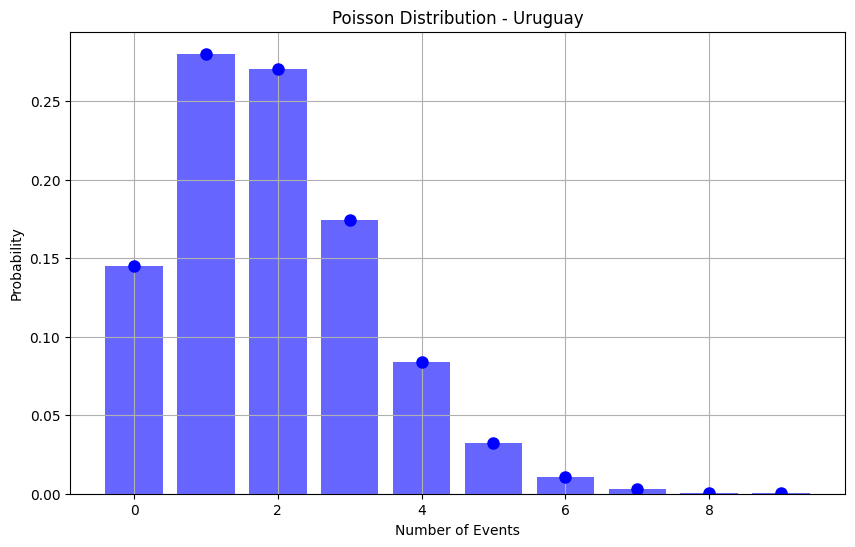

In [27]:
plot_poisson(np.arange(0,10), poisson_probs_g, "Uruguay")


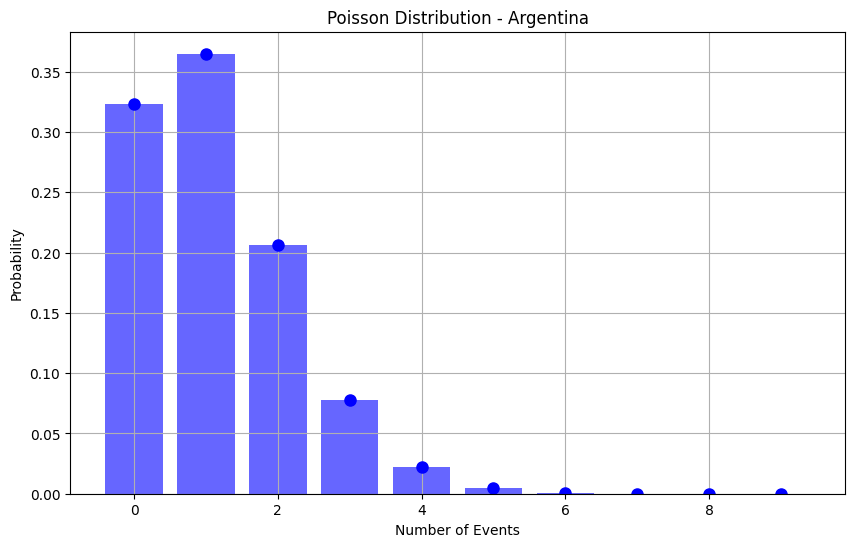

In [28]:
plot_poisson(np.arange(0,10), poisson_probs_s, "Argentina")


In [29]:
res_track = np.zeros((10,10))

for i in range(len(poisson_probs_g)):
    for j in range(len(poisson_probs_s)):
        res_prob = poisson_probs_g[i]*poisson_probs_s[j]
        res_track[j][i] = res_prob

In [30]:
poisson_probs_g


array([1.45096945e-01, 2.80088348e-01, 2.70334716e-01, 1.73947159e-01,
       8.39448627e-02, 3.24086464e-02, 1.04266889e-02, 2.87531315e-03,
       6.93796234e-04, 1.48807974e-04])

In [31]:
poisson_probs_s


array([3.23033256e-01, 3.65027580e-01, 2.06240583e-01, 7.76839528e-02,
       2.19457167e-02, 4.95973196e-03, 9.34082853e-04, 1.50787661e-04,
       2.12987571e-05, 2.67417728e-06])

In [32]:
res_df = pd.DataFrame(res_track)


In [33]:
res_df.columns = ["Uruguay " + str(a) for a in res_df.columns] 
res_df.index = ["Argentina " + str(a) for a in res_df.index] 

In [34]:
def style_specific_cells(x):
    color = ''
    
    df_styled = pd.DataFrame('', index=x.index, columns=x.columns)
    for i in range(x.shape[0]):
        for j in range(x.shape[1]):
            if i == j:
                color = 'background-color: yellow'
            elif j > i:
                color = 'background-color: lightgreen'
            else:
                color = 'background-color: lightcoral'
            df_styled.iloc[i, j] = color
    return df_styled

In [35]:
res_df.style.format("{:.2%}").apply(style_specific_cells, axis=None)


,Uruguay 0,Uruguay 1,Uruguay 2,Uruguay 3,Uruguay 4,Uruguay 5,Uruguay 6,Uruguay 7,Uruguay 8,Uruguay 9
Argentina 0,4.69%,9.05%,8.73%,5.62%,2.71%,1.05%,0.34%,0.09%,0.02%,0.00%
Argentina 1,5.30%,10.22%,9.87%,6.35%,3.06%,1.18%,0.38%,0.10%,0.03%,0.01%
Argentina 2,2.99%,5.78%,5.58%,3.59%,1.73%,0.67%,0.22%,0.06%,0.01%,0.00%
Argentina 3,1.13%,2.18%,2.10%,1.35%,0.65%,0.25%,0.08%,0.02%,0.01%,0.00%
Argentina 4,0.32%,0.61%,0.59%,0.38%,0.18%,0.07%,0.02%,0.01%,0.00%,0.00%
Argentina 5,0.07%,0.14%,0.13%,0.09%,0.04%,0.02%,0.01%,0.00%,0.00%,0.00%
Argentina 6,0.01%,0.03%,0.03%,0.02%,0.01%,0.00%,0.00%,0.00%,0.00%,0.00%
Argentina 7,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%
Argentina 8,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%
Argentina 9,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%


In [36]:
def find_probs(poisson_home, poisson_away):
    home_probs = []
    away_probs = []
    
    draw_probs = []
    
    for i in range(len(poisson_home)):
        for j in range(len(poisson_away)):
            res_prob = poisson_home[i]*poisson_away[j]
            
            if i == j:
                draw_probs.append(res_prob)
            elif i > j:
                home_probs.append(res_prob)
            elif j > i:
                away_probs.append(res_prob)
            #res_track[j][i] = res_prob
    
    
    return sum(home_probs), sum(draw_probs), sum(away_probs), poisson_home.tolist().index(max(poisson_home.tolist())), poisson_away.tolist().index(max(poisson_away.tolist()))

In [37]:
gw, draw, sw, g1, g2 = find_probs(poisson_probs_g, poisson_probs_s)


In [38]:
print(f"Uruguay Wins: {gw:.2%}")
print(f"Draw: {draw:.2%}")
print(f"Argentina Wins: {sw:.2%}")

Uruguay Wins: 56.00%
Draw: 22.04%
Argentina Wins: 21.96%
